### Importing required libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')

In [209]:
df=pd.read_csv('data_house.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## EDA

In [31]:
df.shape

(4600, 18)

In [32]:
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  4600
Number of columns:  18


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [34]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### Checking if there is any null values

In [35]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Checking if any duplicated values

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


### Dropping unnecessory columns

In [38]:
df.drop(['date','statezip'],axis=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Correlation

In [39]:
corr=df.select_dtypes(include='number').corr()

<Axes: >

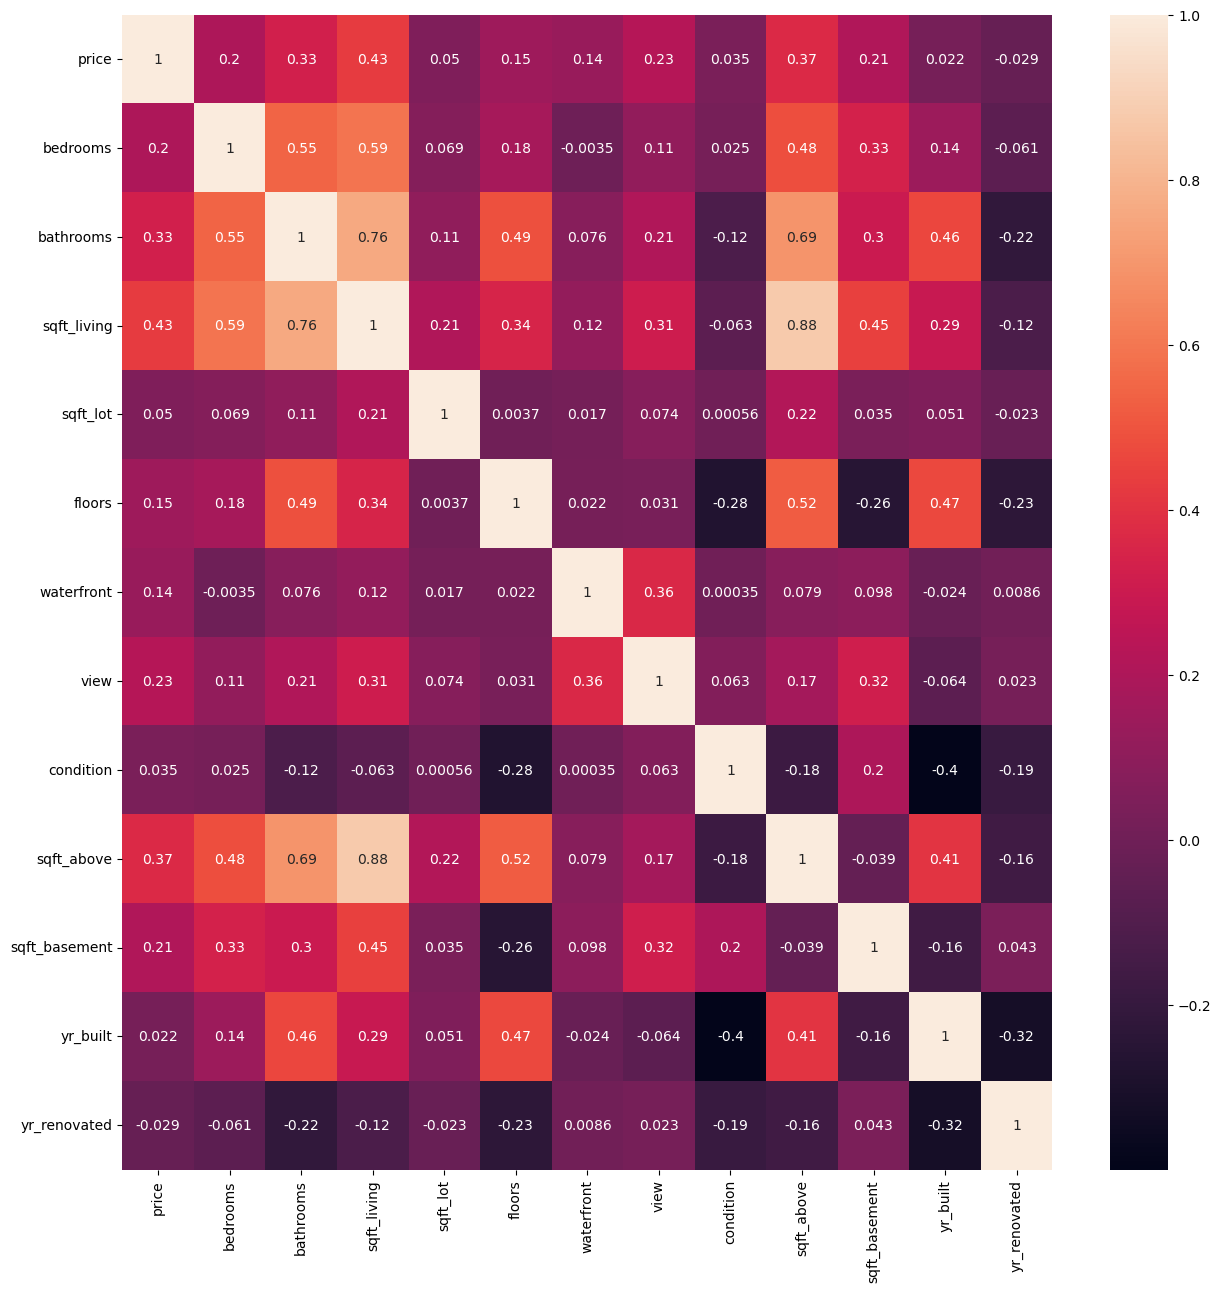

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)


## Exploring each column

In [41]:
df['price'].value_counts()

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64

Text(0.5, 1.0, 'Distribution of price')

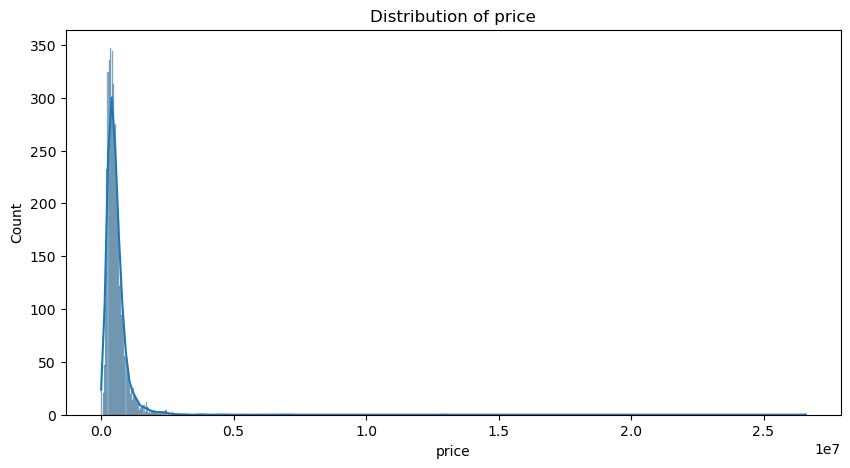

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'],kde=True)
plt.title('Distribution of price')

In [43]:
df['bedrooms'].value_counts()

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

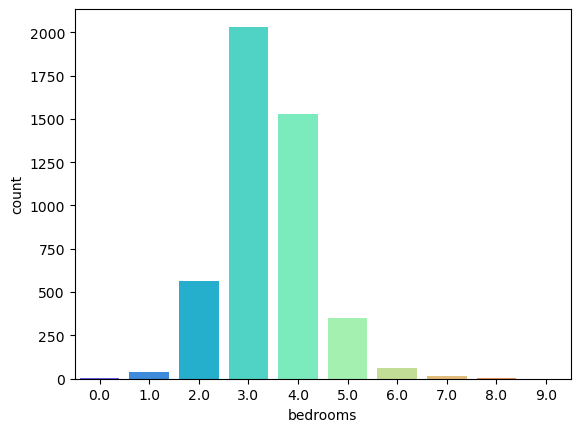

In [44]:
sns.countplot(x=df['bedrooms'],data=df,palette='rainbow')

### it is observed that houses with 3 or 4 bedrooms are common in the dataset.

In [45]:
df['bathrooms'].value_counts()

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of number of bathrooms in the houses')

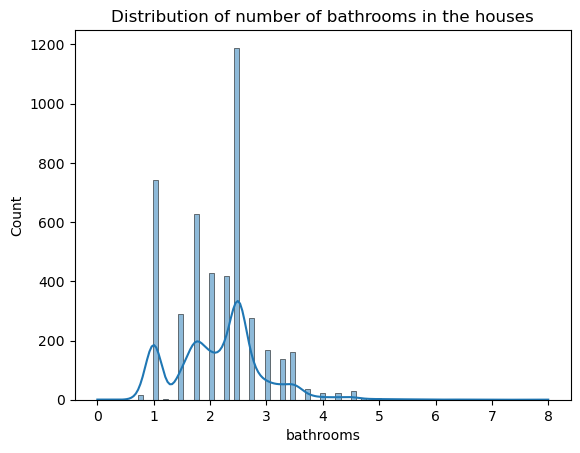

In [46]:
sns.histplot(x=df['bathrooms'],data=df,kde=True)
plt.title('Distribution of number of bathrooms in the houses')

Text(0.5, 1.0, 'Price VS Number of bathrooms present')

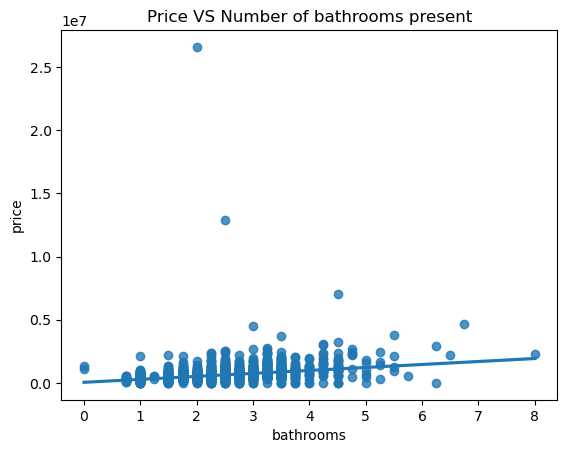

In [47]:
sns.regplot(x='bathrooms', y='price', data=df)  
plt.title('Price VS Number of bathrooms present')


Text(0.5, 1.0, 'Price VS Number of bedrooms present')

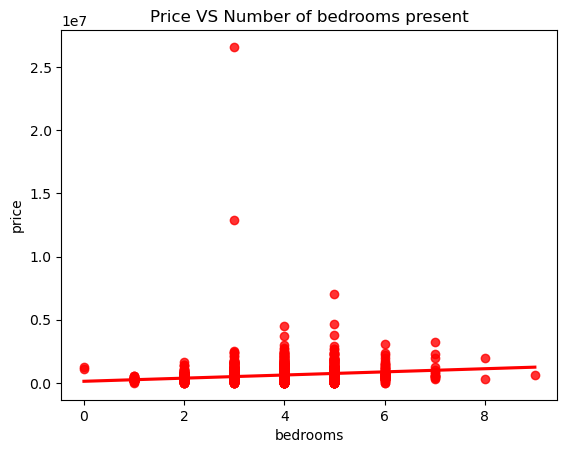

In [48]:
sns.regplot(x='bedrooms', y='price', data=df,color='red')  
plt.title('Price VS Number of bedrooms present')


In [49]:
df['yr_built'].value_counts()

yr_built
2006    111
2005    104
2007     93
2004     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: count, Length: 115, dtype: int64

In [50]:
df['yr_built'].unique()

array([1955, 1921, 1966, 1963, 1976, 1938, 1989, 1985, 1945, 1948, 1909,
       1980, 1939, 1965, 1956, 1997, 1987, 1983, 1923, 1954, 2005, 1991,
       1959, 1920, 1979, 1951, 1967, 2004, 2014, 1995, 1944, 1992, 1957,
       1978, 1974, 1950, 1990, 1949, 1968, 1977, 1996, 2001, 2000, 1929,
       2006, 2008, 2009, 2012, 2013, 2007, 1986, 1973, 1988, 1900, 1928,
       1982, 1960, 2003, 1998, 1942, 1908, 1958, 1971, 1975, 1961, 1924,
       1902, 1962, 1953, 1999, 1994, 1930, 1984, 2010, 1912, 1947, 1916,
       1940, 1970, 1952, 1964, 1926, 1905, 1969, 1903, 1943, 1993, 1946,
       1910, 1904, 1981, 1906, 1922, 2011, 2002, 1917, 1913, 1914, 1937,
       1925, 1932, 1918, 1972, 1941, 1919, 1936, 1911, 1927, 1931, 1901,
       1907, 1915, 1935, 1933, 1934], dtype=int64)

In [51]:
df['yr_built'].nunique()

115

<Axes: xlabel='yr_built', ylabel='Count'>

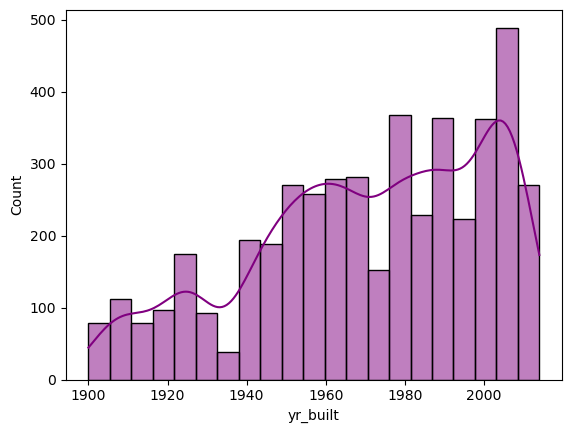

In [52]:
sns.histplot(x=df['yr_built'],data=df,kde=True,color='purple')


In [53]:
df['yr_renovated'].value_counts()

yr_renovated
0       2735
2000     170
2003     151
2009     109
2001     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2012      45
2008      45
1988      43
1999      41
2002      41
1983      41
1998      40
1993      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1996      22
1982      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1970       9
1968       9
1954       8
1945       7
2007       7
1974       6
1934       6
1971       5
1958       5
1986       5
1978       3
1980       2
1995       2
1955       2
1977       1
1913       1
1991       1
1948       1
1966       1
1960       1
1987       1
1953       1
1981       1
1975       1
Name: count, dtype: int64

In [54]:
df['street'].value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [55]:
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [59]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

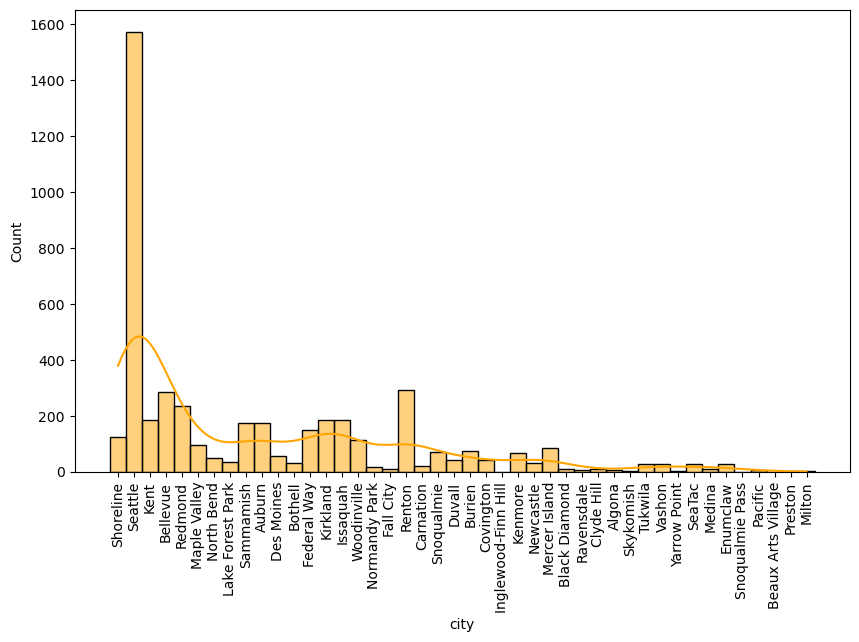

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['city'],data=df,kde=True,color='orange')
plt.xticks(rotation=90)
plt.show()

In [57]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [58]:
df['country'].unique()

array(['USA'], dtype=object)

In [71]:
df['statezip'].unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [72]:
df['statezip'].nunique()

77

In [73]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

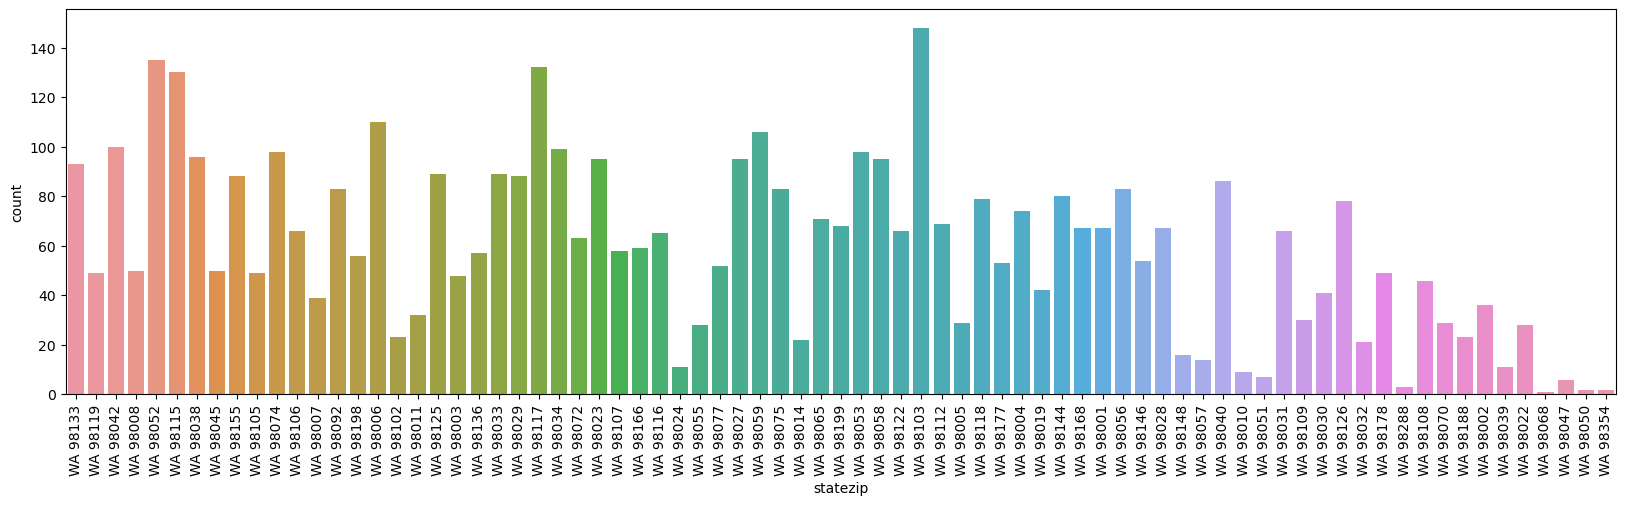

In [80]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['statezip'],data=df)
plt.xticks(rotation=90)
plt.show()

In [97]:
df['sqft_lot'].nunique()

3113

In [89]:
df['floors'].value_counts()

floors
1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: count, dtype: int64

Text(0.5, 1.0, 'No of bathrooms VS Floors')

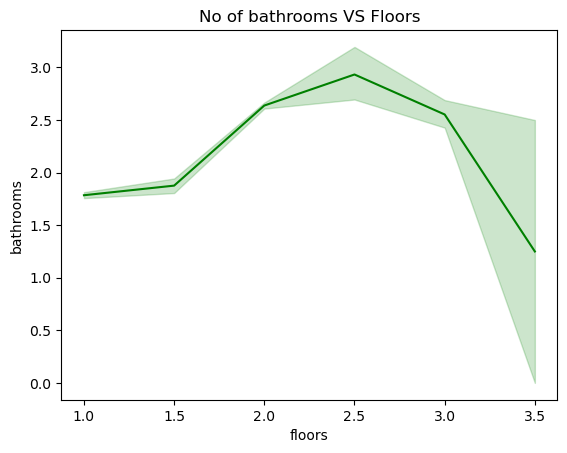

In [108]:
sns.lineplot(x=df['floors'],y=df['bathrooms'],data=df,color='green')
plt.title('No of bathrooms VS Floors')

Text(0.5, 1.0, 'No of bedrooms VS Floors')

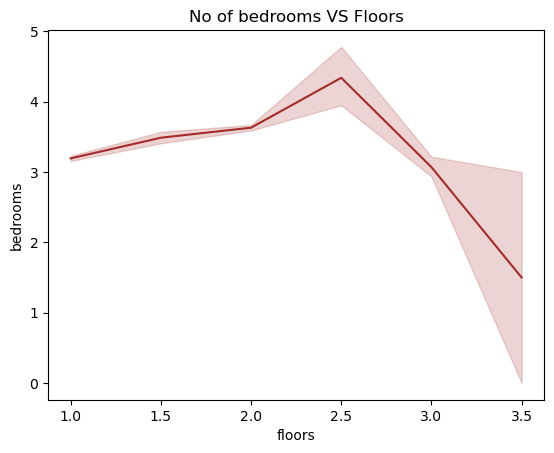

In [111]:
sns.lineplot(x=df['floors'],y=df['bedrooms'],data=df,color='brown')
plt.title('No of bedrooms VS Floors')

Text(0.5, 1.0, 'No of bedrooms VS Floors VS Price')

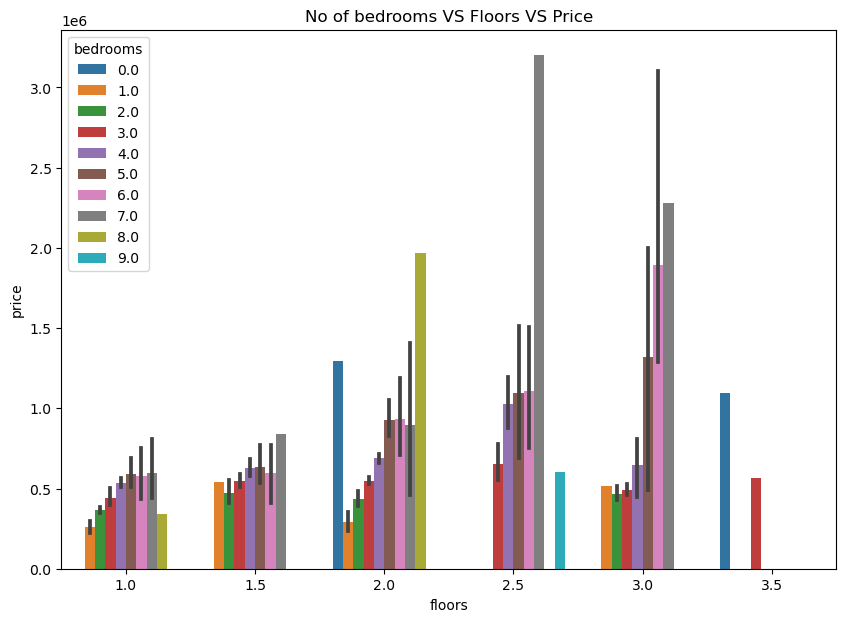

In [115]:
plt.figure(figsize=(10,7))

sns.barplot(x=df['floors'],y=df['price'],data=df,hue=df['bedrooms'])
plt.title('No of bedrooms VS Floors VS Price')

Text(0.5, 1.0, 'Price VS sqft_above')

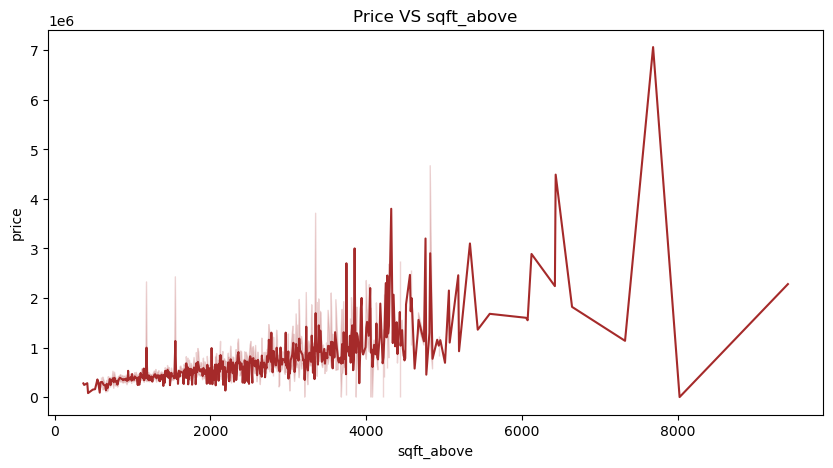

In [130]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['sqft_above'],y=df['price'],data=df,color='brown')
plt.title('Price VS sqft_above')

<Axes: xlabel='sqft_above', ylabel='Count'>

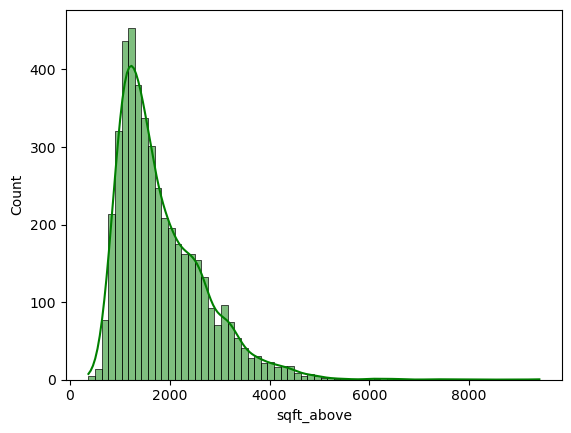

In [128]:
sns.histplot(x=df['sqft_above'],data=df,kde=True,color='green')


In [81]:
df['sqft_living'].value_counts()

sqft_living
1940     32
1720     32
1660     31
1840     31
2000     30
         ..
2732      1
2009      1
1295      1
10040     1
2538      1
Name: count, Length: 566, dtype: int64

Text(0.5, 1.0, 'Price VS sqft_living')

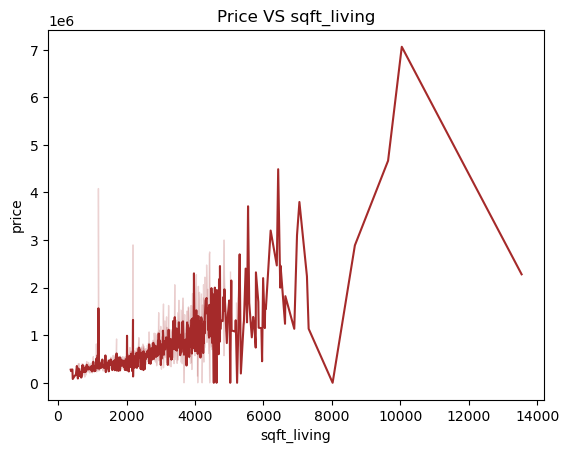

In [132]:
sns.lineplot(x=df['sqft_living'],y=df['price'],data=df,color='brown')
plt.title('Price VS sqft_living')

In [138]:
df['condition'].value_counts()

condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64

Text(0.5, 1.0, 'Price VS condition')

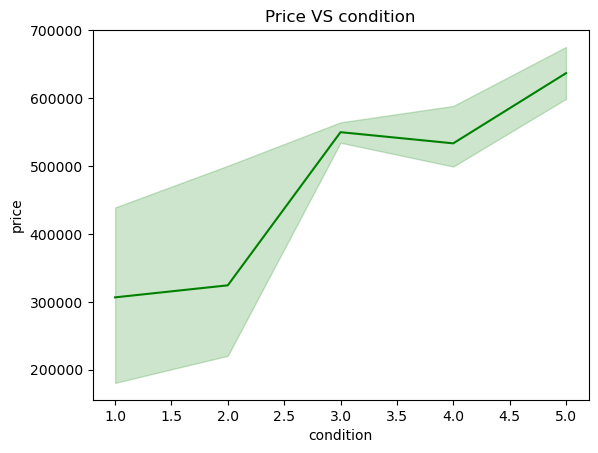

In [143]:
sns.lineplot(x=df['condition'],y=df['price'],data=df,color='green')
plt.title('Price VS condition')

Text(0.5, 1.0, 'Price VS condition VS bedrooms')

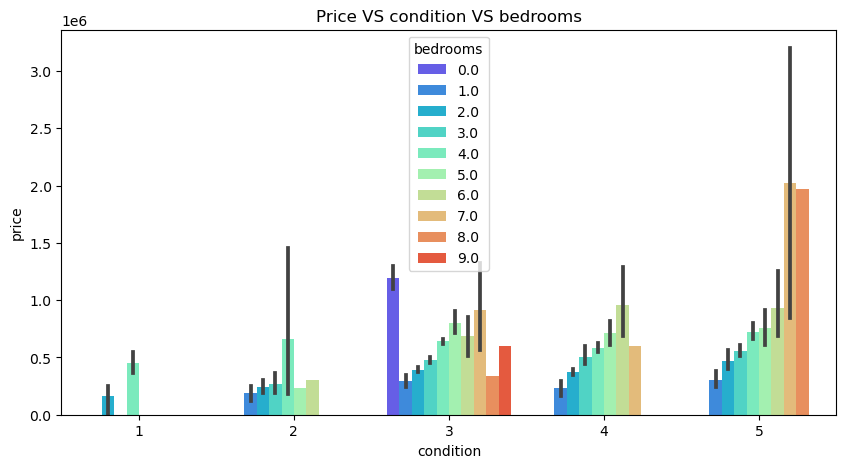

In [146]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['condition'],y=df['price'],data=df,palette='rainbow',hue=df['bedrooms'])
plt.title('Price VS condition VS bedrooms')

In [91]:
df['waterfront'].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

In [98]:
df['view'].value_counts()

view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64

In [117]:
df['sqft_basement'].value_counts()

sqft_basement
0       2745
500       53
600       45
800       43
900       41
        ... 
2300       1
265        1
1610       1
862        1
1640       1
Name: count, Length: 207, dtype: int64

In [116]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [210]:
df['statezip']=df['statezip'].str.replace('WA'," ")

In [212]:
df.drop(['date','sqft_basement','waterfront', 'view', 'statezip', 'country','street','yr_renovated'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,city
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,1955,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,1921,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,1966,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1963,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,1976,Redmond


### One hot encoding

In [213]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,drop='first')
city_reshaped = np.array(df['city']).reshape(-1, 1)

city_encoded=encoder.fit_transform(city_reshaped)

# Retrieve the feature names
feature_names = encoder.get_feature_names_out(['city'])
city_df=pd.DataFrame(city_encoded, columns=feature_names)
# Convert the result to a DataFrame
df = pd.concat([df,city_df],axis=1)
df.dropna(inplace=True)

In [218]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,city_Auburn,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.5,1340,7912,1.5,3,1340,1955,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.5,3650,9050,2.0,5,3370,1921,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
df.drop('city',axis=1,inplace=True)

In [216]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'yr_built', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'],
     

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     4600 non-null   float64
 1   bedrooms                  4600 non-null   float64
 2   bathrooms                 4600 non-null   float64
 3   sqft_living               4600 non-null   int64  
 4   sqft_lot                  4600 non-null   int64  
 5   floors                    4600 non-null   float64
 6   condition                 4600 non-null   int64  
 7   sqft_above                4600 non-null   int64  
 8   yr_built                  4600 non-null   int64  
 9   city_Auburn               4600 non-null   float64
 10  city_Beaux Arts Village   4600 non-null   float64
 11  city_Bellevue             4600 non-null   float64
 12  city_Black Diamond        4600 non-null   float64
 13  city_Bothell              4600 non-null   float64
 14  city_Bur

In [222]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,city_Auburn,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.5,1340,7912,1.5,3,1340,1955,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.5,3650,9050,2.0,5,3370,1921,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.0,1930,11947,1.0,4,1930,1966,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting data into features and target variables

In [220]:
x=df.drop('price',axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,city_Auburn,city_Beaux Arts Village,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.0,1.50,1340,7912,1.5,3,1340,1955,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,2.50,3650,9050,2.0,5,3370,1921,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2.00,1930,11947,1.0,4,1930,1966,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.25,2000,8030,1.0,4,1000,1963,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.50,1940,10500,1.0,4,1140,1976,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
y=df['price']
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

### Splitting into train and test data

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [227]:
print('x_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

x_train :  (3220, 51)
y_train :  (3220,)
x_test :  (1380, 51)
y_test :  (1380,)


## Scaling

In [228]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Classification models

## 1. LinearRegression

In [231]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
y_pred

array([409460.37644383, 225684.6190572 , 948868.2991019 , ...,
       170558.25710579, 340787.03434849, 646367.54723641])

In [234]:
r2_lr=r2_score(y_test,y_pred)
r2_lr

-6.902871899393958e+20

In [236]:
mse_lr=mean_squared_error(y_test,y_pred)
mse_lr

4.986993496961396e+32

In [238]:

# Create a Ridge regression model
ridge_model = Ridge()

param_grid = {'alpha': [0.1, 1.0, 10.0]}  

scoring_metric = make_scorer(r2_score)

grid_search = GridSearchCV(ridge_model, param_grid, scoring=scoring_metric, cv=5)
grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_train, y_train)

y_pred = best_ridge_model.predict(x_test)

r2_best_model = r2_score(y_test, y_pred)
mse_best_model = mean_squared_error(y_test, y_pred)

print("Best Model R-squared:", r2_best_model)
print("Best Model Mean Squared Error:", mse_best_model)


Best Model R-squared: 0.07321264864336807
Best Model Mean Squared Error: 669559360457.9829


## 2.Random Forest regressor


In [243]:

rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [5,10,15],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

scoring_metric = make_scorer(r2_score)

grid_search = GridSearchCV(rf_model, param_grid, scoring=scoring_metric, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(x_train, y_train)

y_pred_rf = best_rf_model.predict(x_test)

r2_rf_best_model = r2_score(y_test, y_pred_rf)
mse_rf_best_model = mean_squared_error(y_test, y_pred_rf)

print("Best Random Forest Model R-squared:", r2_rf_best_model)
print("Best Random Forest Model Mean Squared Error:", mse_rf_best_model)


Best Random Forest Model R-squared: 0.06865522733538632
Best Random Forest Model Mean Squared Error: 672851878522.5023


## 3.Decision Tree regressor

In [244]:

dt_model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 8, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

scoring_metric = make_scorer(r2_score)

grid_search = GridSearchCV(dt_model, param_grid, scoring=scoring_metric, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(x_train, y_train)

y_pred_dt = best_dt_model.predict(x_test)

r2_dt_best_model = r2_score(y_test, y_pred_dt)
mse_dt_best_model = mean_squared_error(y_test, y_pred_dt)

print("Best Decision Tree Model R-squared:", r2_dt_best_model)
print("Best Decision Tree Model Mean Squared Error:", mse_dt_best_model)


Best Decision Tree Model R-squared: 0.03960378659524333
Best Decision Tree Model Mean Squared Error: 693840149514.6343


## 4. Gradient boost regression

In [245]:

gb_model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [5, 10, 15],  # Reduced number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scoring_metric = make_scorer(r2_score)

grid_search = GridSearchCV(gb_model, param_grid, scoring=scoring_metric, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(x_train, y_train)

y_pred_gb = best_gb_model.predict(x_test)

r2_gb_best_model = r2_score(y_test, y_pred_gb)
mse_gb_best_model = mean_squared_error(y_test, y_pred_gb)

print("Best Gradient Boosting Model R-squared:", r2_gb_best_model)
print("Best Gradient Boosting Model Mean Squared Error:", mse_gb_best_model)


Best Gradient Boosting Model R-squared: 0.07325199668835092
Best Gradient Boosting Model Mean Squared Error: 669530933384.8302


## Model accuracy comparison

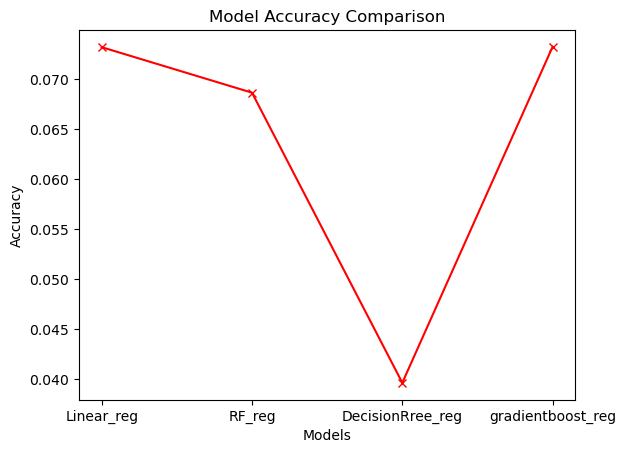

In [246]:
models=['Linear_reg','RF_reg','DecisionRree_reg','gradientboost_reg']
accuracy=[r2_best_model,r2_rf_best_model,r2_dt_best_model,r2_gb_best_model]
plt.plot(models,accuracy,marker="x",linestyle='-',color='red')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()